In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import scipy.stats
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report

In [36]:
nama_file_csv = "/content/drive/MyDrive/Dataset collection/shopping_behavior_updated.csv"
data = pd.read_csv(nama_file_csv)
print(data.head())

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previ

In [4]:
# Memisahkan kolom menjadi numerik dan kategorikal
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns
kolom_kategorikal = data.select_dtypes(include=['object']).columns

# Menampilkan hasil
print("Kolom Numerik:")
print(kolom_numerik)

print("\nKolom Kategorikal:")
print(kolom_kategorikal)

Kolom Numerik:
Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Previous Purchases'],
      dtype='object')

Kolom Kategorikal:
Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')


Dataset yang digunakan adalah dataset "consument behaviour and shopping habits" yang didapatkan dari kaggle. Dataset dapat diakses melalui tautan berikut ini:
https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset

Dataset ini terdiri dari kolom yaitu: costumer ID, Age, Gender, Item Purchased, Category, Purchase Amount, Loacation, Size, Color,  Season, Review Rating, Subscription Status, shipping type, discount applied, promo code used, previous purchase, payment method,. frequency of purchases.

Dari dataset tersebut, analisa yang dapat dilakukan adalah

**Analisis Deskriptif**: Menghitung statistik dasar seperti mean, median, dan mode untuk kolom numerik seperti ‘Age’ dan ‘Purchase Amount (USD)’. Untuk kolom kategorikal seperti ‘Gender’, ‘Item Purchased’, dan ‘Category’, kita bisa menghitung frekuensi dari setiap kategori.

**Analisis Korelasi:** Melihat hubungan antara ‘Age’ dan ‘Purchase Amount (USD)’, atau ‘Review Rating’ dan ‘Previous Purchases’. Ini bisa membantu kita memahami apakah ada hubungan antara usia pelanggan dengan jumlah pembelian, atau apakah rating review mempengaruhi pembelian sebelumnya.

**Analisis Demografis:** Menganalisis distribusi pelanggan berdasarkan ‘Location’, ‘Gender’, dan ‘Age’. Ini bisa memberikan gambaran tentang demografi pelanggan Anda.

**Analisis Perilaku Pelanggan:** Menganalisis ‘Frequency of Purchases’, ‘Previous Purchases’, dan ‘Subscription Status’ untuk memahami perilaku belanja pelanggan.

**Analisis Produk:** Menganalisis ‘Item Purchased’, ‘Category’, ‘Size’, ‘Color’, dan ‘Season’ untuk memahami preferensi produk pelanggan.

**Analisis Penjualan:** Menganalisis ‘Purchase Amount (USD)’ berdasarkan ‘Season’, ‘Location’, dan ‘Category’ untuk memahami tren penjualan.


In [5]:
#Cek apakah ada data yang kosong
df_data = data.isna().sum()
print(df_data)

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [6]:
data = data.drop('Customer ID', axis=1, errors='ignore' )

In [7]:
#deskripsi statistik
descriptive_stats = data.describe()

#Display results
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
                Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000           25.000000
75%      57.000000              81.000000       4.400000           38.000000
max      70.000000             100.000000       5.000000           50.000000


In [21]:
def plot_histogram(column_data):
    # Menghitung frekuensi histogram menggunakan NumPy
    hist, bin_edges = np.histogram(column_data)

    # Menghitung total frekuensi
    total_freq = np.sum(hist)

    # Menghitung nilai normalisasi (hi = ni/n)
    normalized_hist = hist / total_freq

    # Menghitung mean dan standar deviasi dari kolom
    mean_value = np.mean(column_data)
    std_deviation = np.std(column_data)

    # Membuat plot histogram yang dinormalisasi
    plt.figure(figsize=(10, 6))
    plt.bar(bin_edges[:-1], normalized_hist, width=bin_edges[1] - bin_edges[0], color='skyblue', edgecolor='black', label='Histogram')

    # Menambahkan garis pada histogram
    plt.plot((bin_edges[:-1] + bin_edges[1:]) / 2, normalized_hist, color='red', linestyle='dashed', linewidth=2, label='Line')

    # Menambahkan garis untuk mean
    plt.axvline(mean_value, color='green', linestyle='solid', linewidth=2, label='Mean')

    # Menambahkan garis untuk satu standar deviasi di atas dan di bawah mean
    plt.axvline(mean_value + std_deviation, color='orange', linestyle='solid', linewidth=2, label='Mean + 1 SD')
    plt.axvline(mean_value - std_deviation, color='orange', linestyle='solid', linewidth=2, label='Mean - 1 SD')

    plt.title(f'Histogram Variabel {column_data.name}')
    plt.xlabel(column_data.name)
    plt.ylabel('Probability')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

    # Menampilkan nilai normalisasi dan rentang nilai untuk setiap bin
    for i in range(len(normalized_hist)):
        bin_range = (bin_edges[i], bin_edges[i + 1])
        print(f"Bin {i + 1}: {normalized_hist[i]}, Range: {bin_range}")

    # Menampilkan mean dan standar deviasi
    print(f"Mean: {mean_value}")
    print(f"Standard Deviation: {std_deviation}")

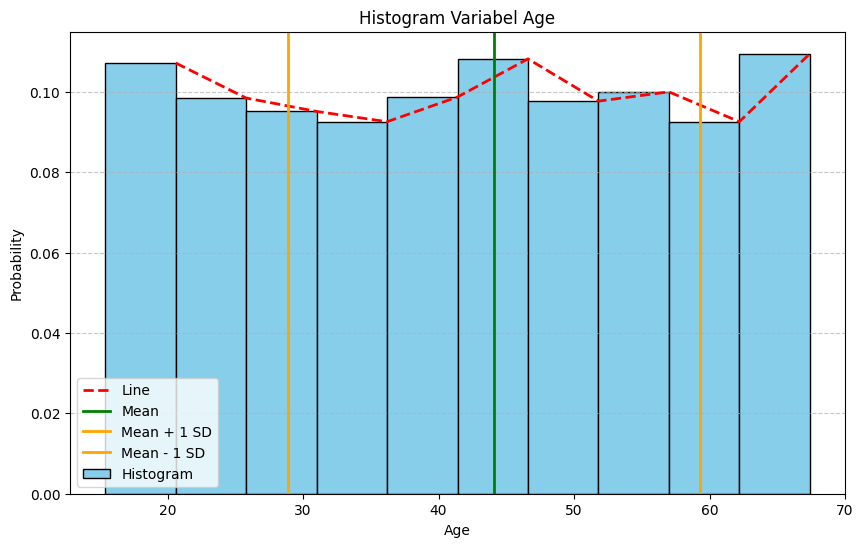

Bin 1: 0.10717948717948718, Range: (18.0, 23.2)
Bin 2: 0.09846153846153846, Range: (23.2, 28.4)
Bin 3: 0.09512820512820513, Range: (28.4, 33.6)
Bin 4: 0.09256410256410257, Range: (33.6, 38.8)
Bin 5: 0.09871794871794871, Range: (38.8, 44.0)
Bin 6: 0.1082051282051282, Range: (44.0, 49.2)
Bin 7: 0.09769230769230769, Range: (49.2, 54.4)
Bin 8: 0.1, Range: (54.4, 59.6)
Bin 9: 0.09256410256410257, Range: (59.6, 64.80000000000001)
Bin 10: 0.10948717948717948, Range: (64.80000000000001, 70.0)
Mean: 44.06846153846154
Standard Deviation: 15.205639311252432


In [22]:
#menampilkan plot histogram dari kolom 'Age'
plot_histogram(data['Age'])

Berdasarkan histogram dari variabel 'Age' dapat dilihat bahwa, rentang nilai tertinggi yaitu antara umur 44 - 49 tahun, yang menunjukkan sebagian besar pelanggan berada pada range usia tersebut. Distribusi usia pelanggan terlihat berpusat di sekitar nilai rata - rata nya. Distribusi umur pelanggan cenderung homogen yang menunjukkan bhawa usia pelanggan tersebar cukup merata.

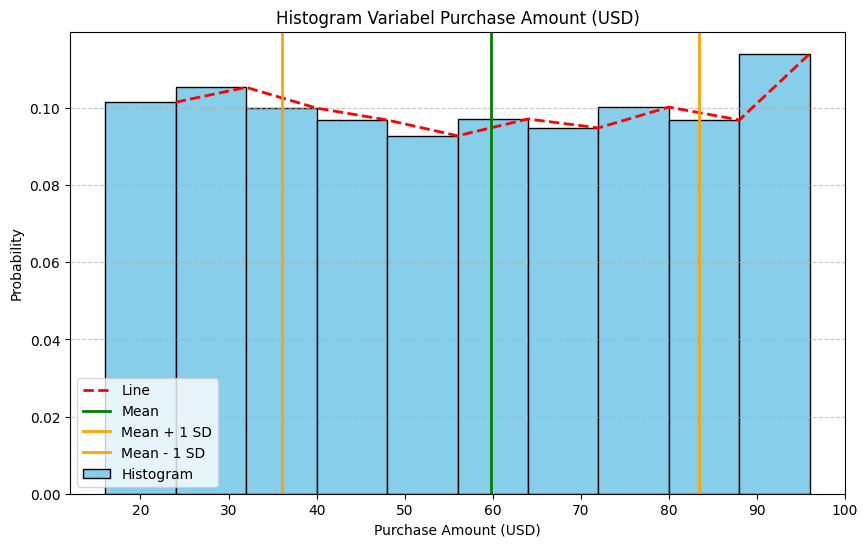

Bin 1: 0.10153846153846154, Range: (20.0, 28.0)
Bin 2: 0.10538461538461538, Range: (28.0, 36.0)
Bin 3: 0.1, Range: (36.0, 44.0)
Bin 4: 0.09692307692307692, Range: (44.0, 52.0)
Bin 5: 0.09282051282051282, Range: (52.0, 60.0)
Bin 6: 0.09717948717948718, Range: (60.0, 68.0)
Bin 7: 0.09487179487179487, Range: (68.0, 76.0)
Bin 8: 0.10025641025641026, Range: (76.0, 84.0)
Bin 9: 0.09692307692307692, Range: (84.0, 92.0)
Bin 10: 0.1141025641025641, Range: (92.0, 100.0)
Mean: 59.76435897435898
Standard Deviation: 23.68235546744711


In [23]:
#menampilkan plot histogram dari kolom 'Purchase Amount (USD)'
plot_histogram(data['Purchase Amount (USD)'])

Berdasarkan histogram dari variabel 'Purchase Amount (USD)' dapat dilihat bahwa distribusi pembelian tampak merata dan mencapai puncak disekitar rentang nilai antara 92 - 100 yang menunjukkan bahwa sebgaian besar pembelian berada dalam rentang tersebut. rata - rata pembelian berada di nilai 59.76 dan nilai standar deviasi cukup tinggi yaitu 23.68 yang menunjukkan tingkat dispresi (variablitias) yang signifikan dalam pembelian. Hal ini berarti adanya kelompok pelanggan yang melakukan pembelian dalam jumlah yang sangat bervariasi.

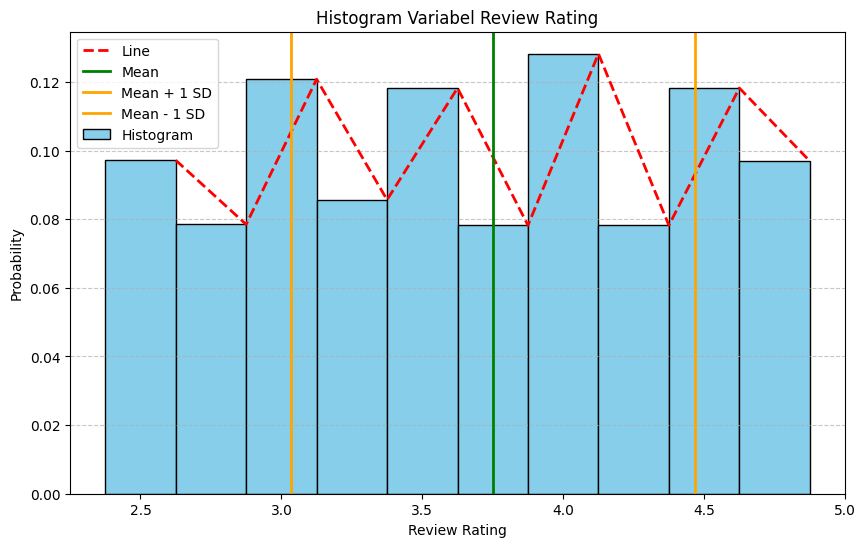

Bin 1: 0.09717948717948718, Range: (2.5, 2.75)
Bin 2: 0.07846153846153846, Range: (2.75, 3.0)
Bin 3: 0.12076923076923077, Range: (3.0, 3.25)
Bin 4: 0.08564102564102564, Range: (3.25, 3.5)
Bin 5: 0.1182051282051282, Range: (3.5, 3.75)
Bin 6: 0.0782051282051282, Range: (3.75, 4.0)
Bin 7: 0.1282051282051282, Range: (4.0, 4.25)
Bin 8: 0.0782051282051282, Range: (4.25, 4.5)
Bin 9: 0.1182051282051282, Range: (4.5, 4.75)
Bin 10: 0.09692307692307692, Range: (4.75, 5.0)
Mean: 3.7499487179487176
Standard Deviation: 0.7161309846066857


In [24]:
#menampilkan plot histogram dari kolom 'Review Rating'
plot_histogram(data['Review Rating'])

Berdasarkan histogram dari variabel Reviw Rating, dapat dilihat bahwa rating ulasan terlihat cukup merata dengan puncak berada disekitar nilai 4.0 - 4.25 dan sebagian besar ulasan berada pada rentang nilai tersebut. Nilai rata - rata rating ulasan adalah sekitar 3.75. Standar deviasi cukup tinggi yaitu 0.72 yang menunjukkan variasi yang signifikan dalam rating ulasan. Hal ini menunjukkan perbedaan besar antara rating yang diberikan oleh pelanggan.

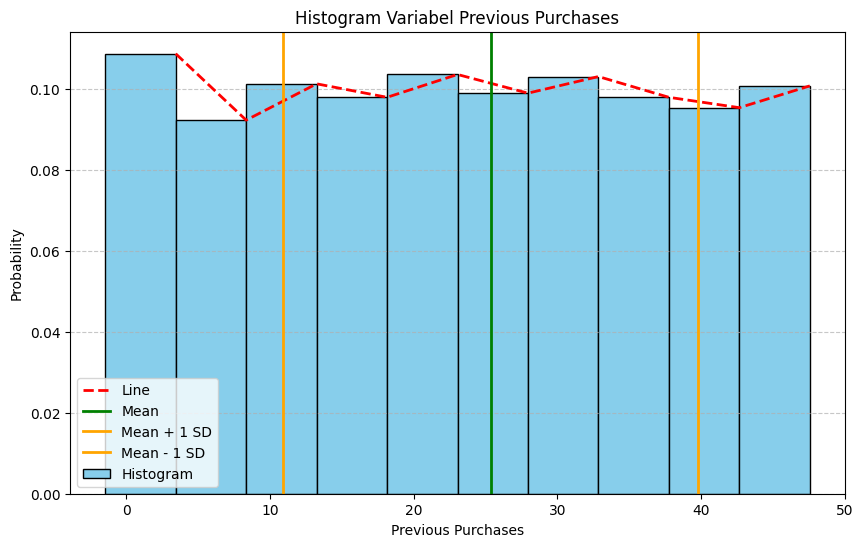

Bin 1: 0.10871794871794872, Range: (1.0, 5.9)
Bin 2: 0.09230769230769231, Range: (5.9, 10.8)
Bin 3: 0.10128205128205128, Range: (10.8, 15.700000000000001)
Bin 4: 0.09794871794871794, Range: (15.700000000000001, 20.6)
Bin 5: 0.10358974358974359, Range: (20.6, 25.5)
Bin 6: 0.09897435897435898, Range: (25.5, 30.400000000000002)
Bin 7: 0.10307692307692308, Range: (30.400000000000002, 35.300000000000004)
Bin 8: 0.09794871794871794, Range: (35.300000000000004, 40.2)
Bin 9: 0.09538461538461539, Range: (40.2, 45.1)
Bin 10: 0.10076923076923076, Range: (45.1, 50.0)
Mean: 25.35153846153846
Standard Deviation: 14.445272856181926


In [25]:
#menampilkan plot histogram dari kolom 'Previous Purchases'
plot_histogram(data['Previous Purchases'])

Berdasarkan histogram variabel "Previous Purchases" dapat dilihat bahwa, distribusi pembelian sebelumnya cukup merata di sepanjang bin. Sebagian besar pelanggan melakukan pembelian sebelumnya di rentang nilai 1 - 5.9. Rata - rata jumlah pembelian sebelumnya adalah sekitar 23.35. Nilai standar deviasi cukup tinggi taitu 14.45. Hal tersebut menunjukkan variasi yang signifikan dalam jumlah pembelian sebelumnya. Ini dapat menunjukkan perbedaan besar antara pelanggan dalam hal seberapa sering mereka berbelanja sebelumnya.

In [26]:
def plot_categorical_distribution(data, categorical_columns):
    """
    Fungsi untuk membuat subplot berisi distribusi frekuensi variabel kategorikal.

    Parameters:
    - data: DataFrame, dataset yang akan dianalisis
    - categorical_columns: list, daftar variabel kategorikal yang akan dianalisis
    """

    num_columns = len(categorical_columns)
    num_rows = (num_columns + 1) // 2

    # Setel ukuran plot
    plt.figure(figsize=(15, 5 * num_rows))

    # Loop untuk membuat subplot untuk setiap variabel kategorikal
    for i, column in enumerate(categorical_columns, 1):
        plt.subplot(num_rows, 2, i)

        # Menghitung frekuensi
        frequencies = data[column].value_counts().head(7)

        # Menghitung persentase
        percentages = data[column].value_counts(normalize=True) * 100

        # Membuat bar chart dengan warna kustom (misalnya, 'skyblue')
        sns.barplot(x=frequencies.index, y=frequencies.values, color='Silver')

        # Menambahkan label pada sumbu x dan y
        plt.xlabel(column)
        plt.ylabel('Frequency')

        # Menambahkan judul
        plt.title(f'Frequency Distribution of {column}')

    # Menyesuaikan tata letak subplot
    plt.tight_layout()
    plt.show()

    # Loop untuk mencetak distribusi frekuensi untuk setiap variabel kategorikal
    for column in categorical_columns:
        print(f'\nDistribusi Frekuensi untuk {column}:\n')
        # Menghitung frekuensi
        frequencies = data[column].value_counts().head(7)
        # Menghitung persentase
        percentages = data[column].value_counts(normalize=True) * 100
        # Mencetak informasi frekuensi dan persentase
        for category, count, percent in zip(frequencies.index, frequencies.values, percentages.round(2)):
            print(f'{category}: {count} data ({percent}%)')


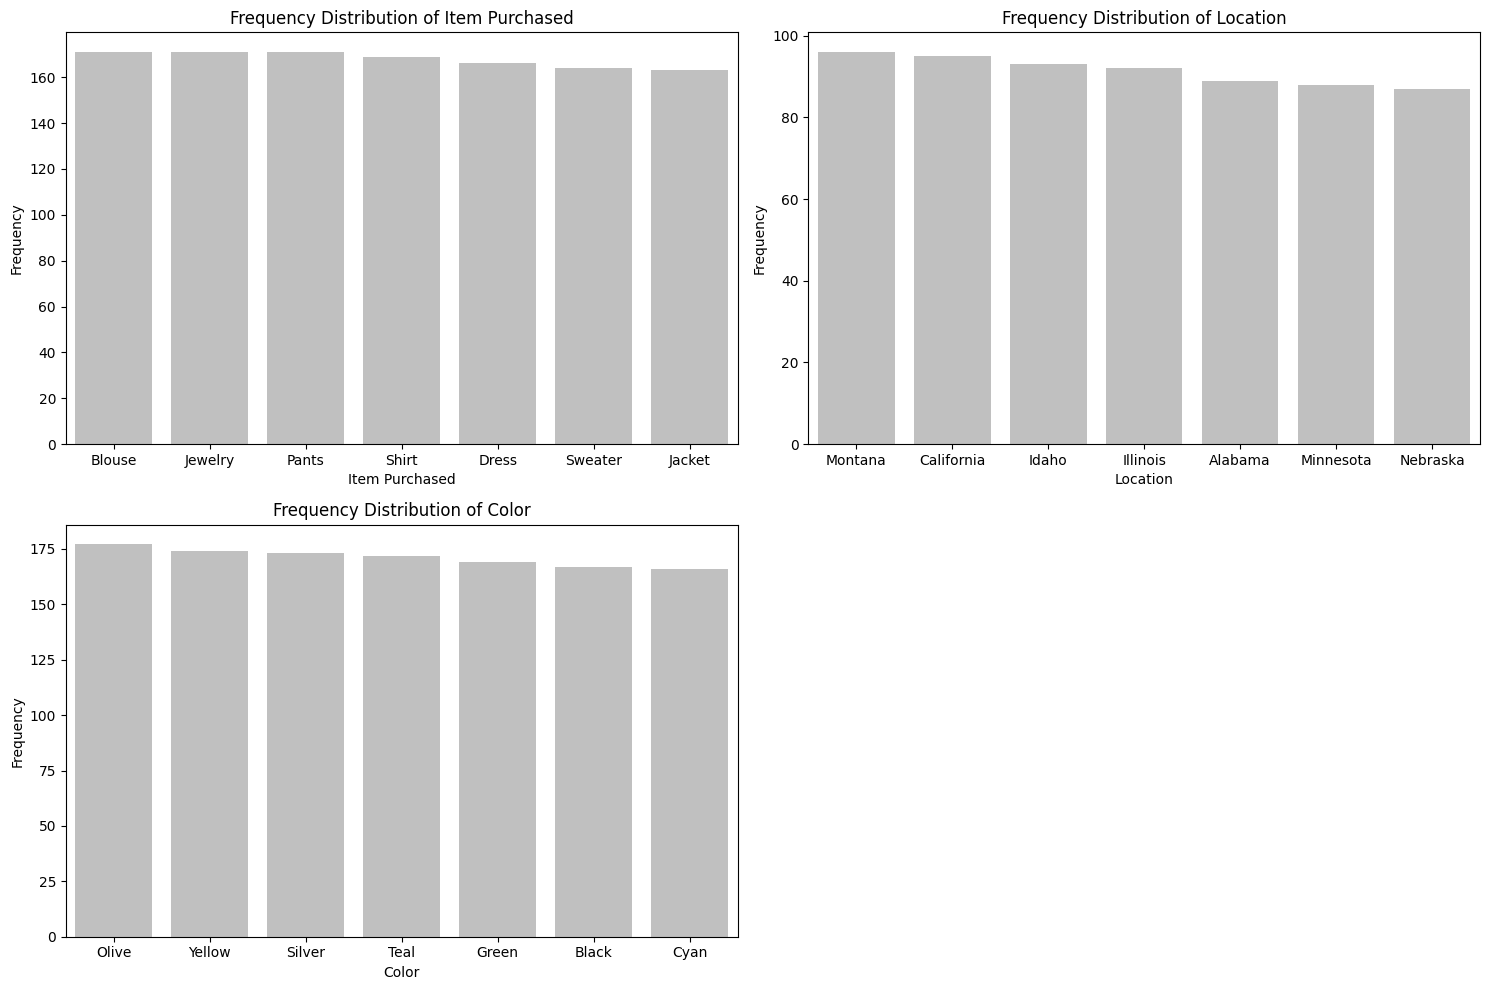


Distribusi Frekuensi untuk Item Purchased:

Blouse: 171 data (4.38%)
Jewelry: 171 data (4.38%)
Pants: 171 data (4.38%)
Shirt: 169 data (4.33%)
Dress: 166 data (4.26%)
Sweater: 164 data (4.21%)
Jacket: 163 data (4.18%)

Distribusi Frekuensi untuk Location:

Montana: 96 data (2.46%)
California: 95 data (2.44%)
Idaho: 93 data (2.38%)
Illinois: 92 data (2.36%)
Alabama: 89 data (2.28%)
Minnesota: 88 data (2.26%)
Nebraska: 87 data (2.23%)

Distribusi Frekuensi untuk Color:

Olive: 177 data (4.54%)
Yellow: 174 data (4.46%)
Silver: 173 data (4.44%)
Teal: 172 data (4.41%)
Green: 169 data (4.33%)
Black: 167 data (4.28%)
Cyan: 166 data (4.26%)


In [28]:
#plot kolom kategori yang dibutuhkan
plot_categorical_distribution(data, ['Item Purchased', 'Location', 'Color'])

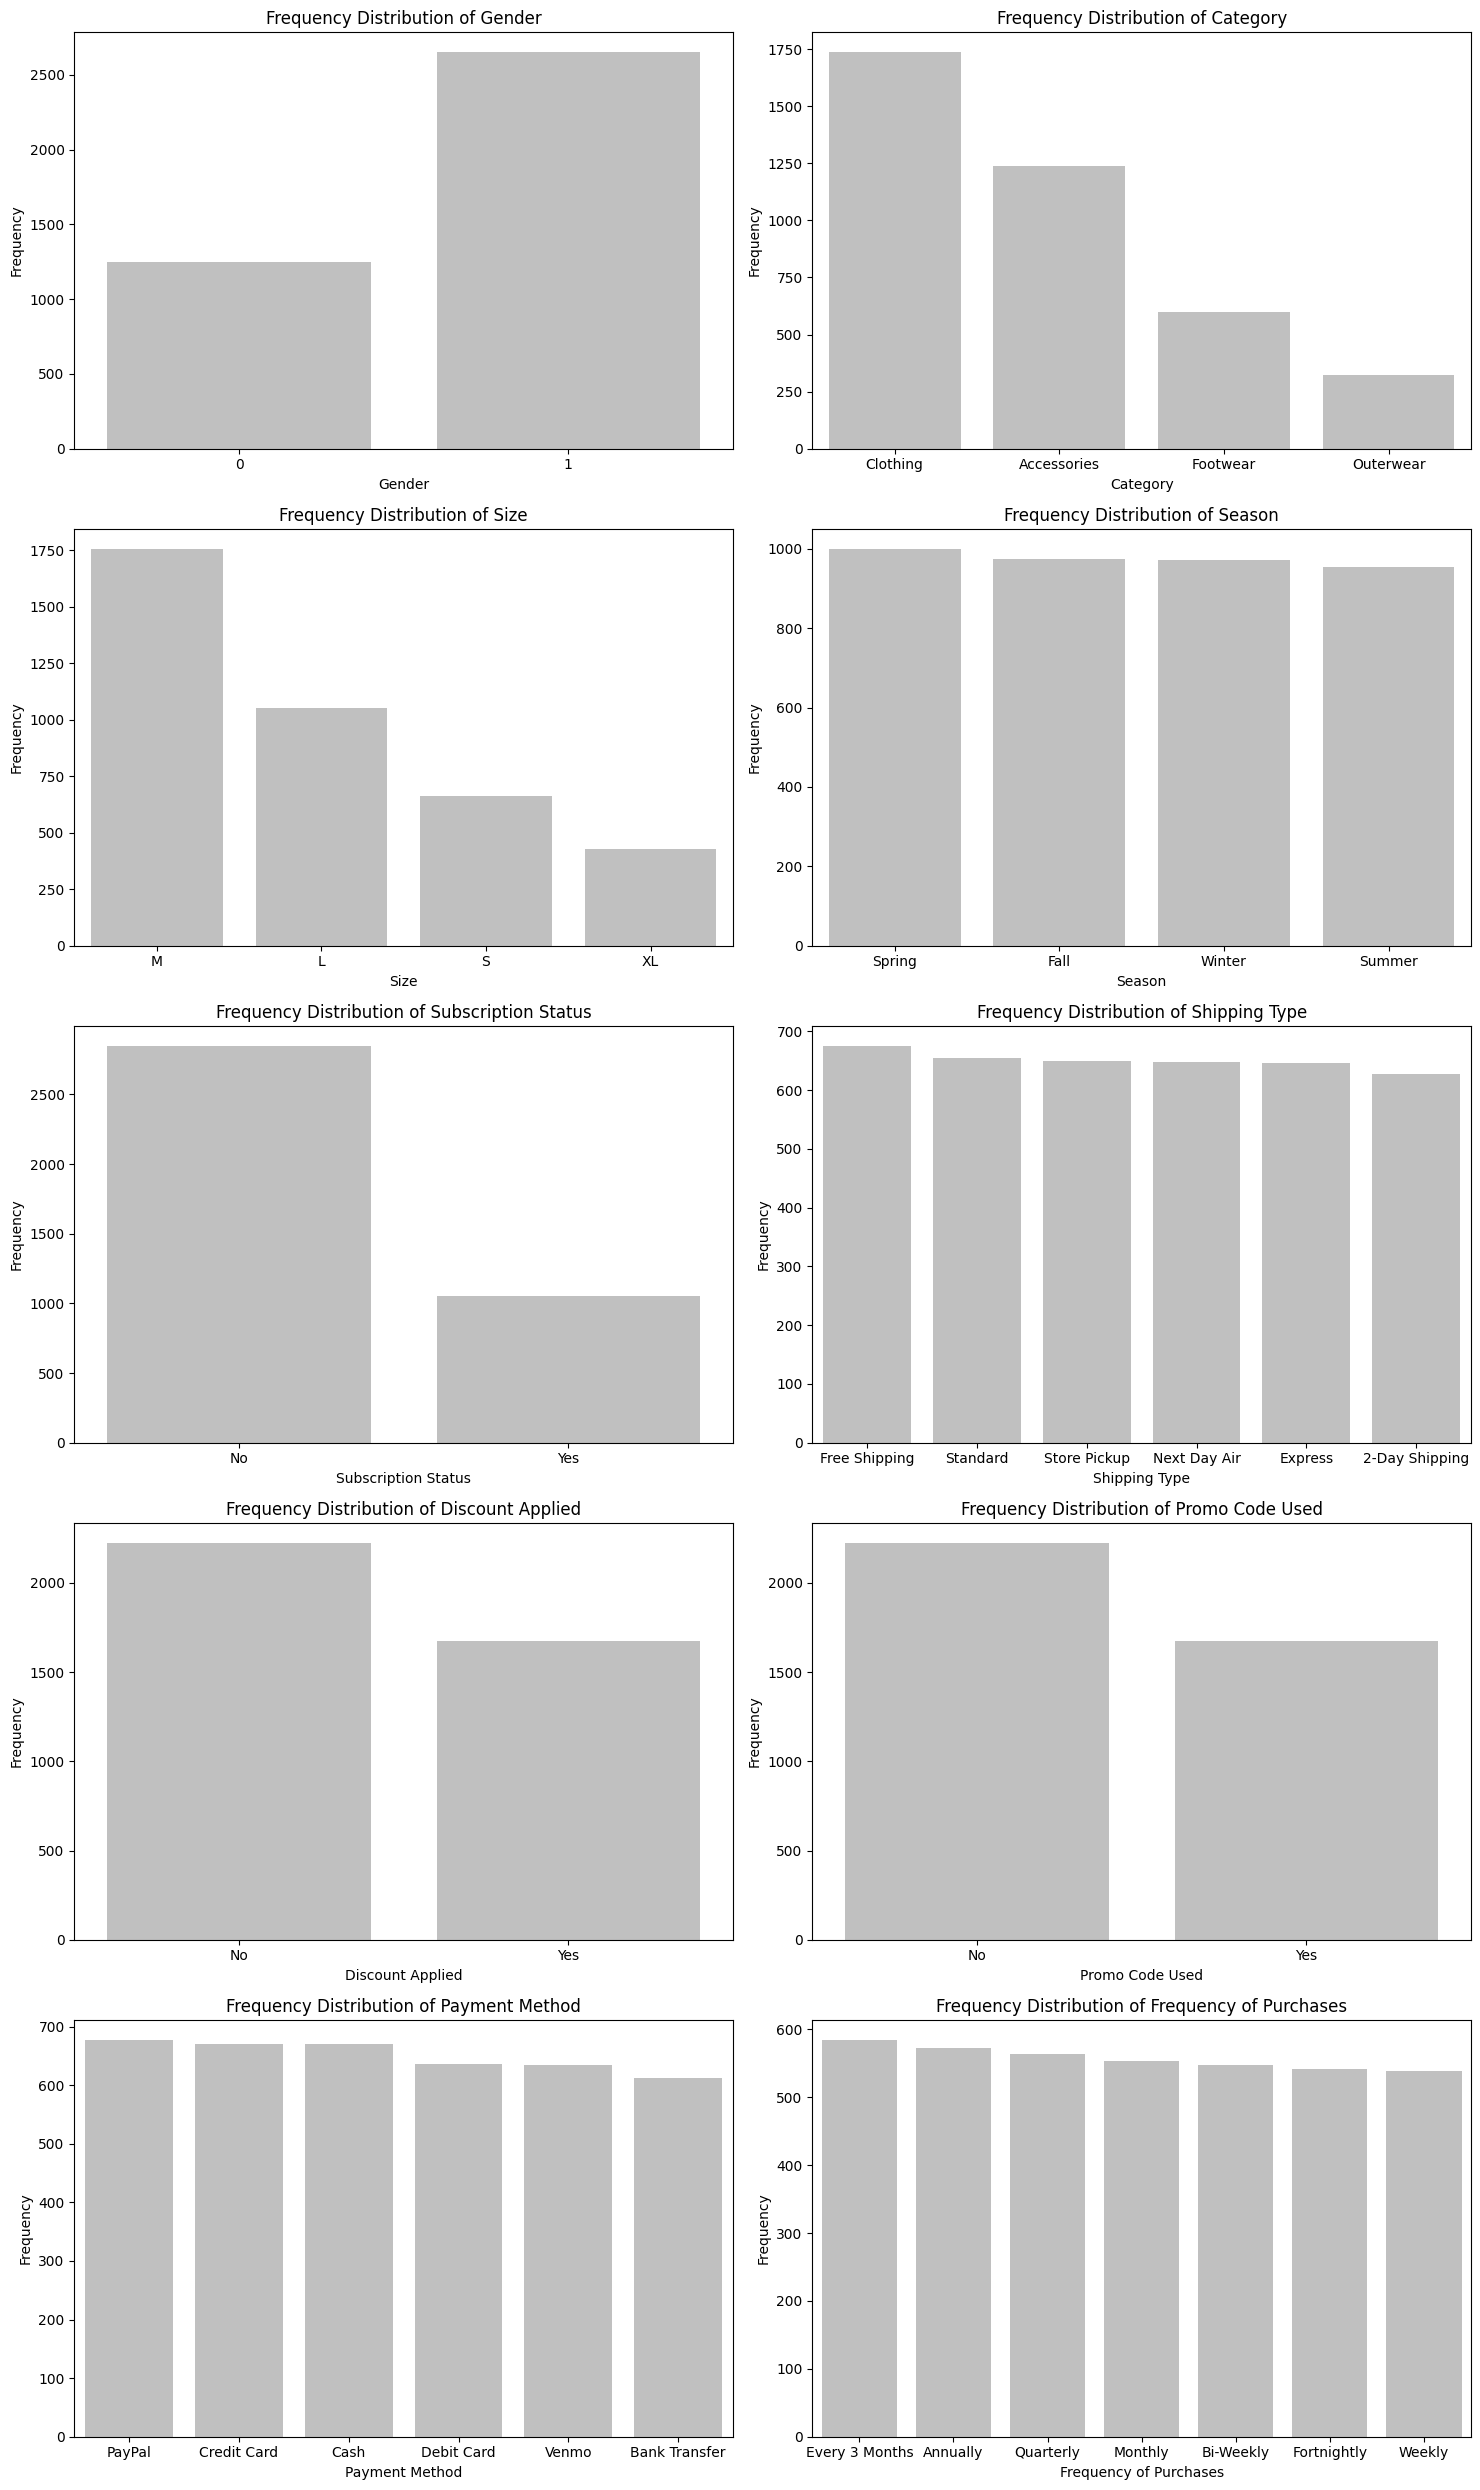


Distribusi Frekuensi untuk Gender:

1: 2652 data (68.0%)
0: 1248 data (32.0%)

Distribusi Frekuensi untuk Category:

Clothing: 1737 data (44.54%)
Accessories: 1240 data (31.79%)
Footwear: 599 data (15.36%)
Outerwear: 324 data (8.31%)

Distribusi Frekuensi untuk Size:

M: 1755 data (45.0%)
L: 1053 data (27.0%)
S: 663 data (17.0%)
XL: 429 data (11.0%)

Distribusi Frekuensi untuk Season:

Spring: 999 data (25.62%)
Fall: 975 data (25.0%)
Winter: 971 data (24.9%)
Summer: 955 data (24.49%)

Distribusi Frekuensi untuk Subscription Status:

No: 2847 data (73.0%)
Yes: 1053 data (27.0%)

Distribusi Frekuensi untuk Shipping Type:

Free Shipping: 675 data (17.31%)
Standard: 654 data (16.77%)
Store Pickup: 650 data (16.67%)
Next Day Air: 648 data (16.62%)
Express: 646 data (16.56%)
2-Day Shipping: 627 data (16.08%)

Distribusi Frekuensi untuk Discount Applied:

No: 2223 data (57.0%)
Yes: 1677 data (43.0%)

Distribusi Frekuensi untuk Promo Code Used:

No: 2223 data (57.0%)
Yes: 1677 data (43.0%)

D

In [29]:
#plot kolom kategori yang dibutuhkan
plot_categorical_distribution(data, ['Gender', 'Category', 'Size', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases'])

Berdasarkan statistik deskriptif, usia rata - rata pelanggan adalah 44 tahun. Selain itu, jumlah pembelian rata - rata adalah 59,8 USD. Berdasarkan informasi ini, dapat dihipotesiskan bahwa ada hubungan positif antara usia dan jumlah pembelian.

1. Hipotesis Nol (H0):
  *   Tidak ada hubungan antara usia dan jumlah pembelian.
  *   ρ=0 (koefisien korelasi Pearson antara usia dan jumlah pembelian adalah 0).

2. Hipotesis Alternatif (H1):

  * Ada hubungan antara usia dan jumlah pembelian.
  * ρ!=0 (koefisien korelasi Pearson antara usia dan jumlah pembelian tidak sama dengan 0).

In [31]:
def calculate_correlation_and_p_value(data, column1, column2, alpha=0.05):
    """
    Fungsi untuk menghitung koefisien korelasi Pearson dan nilai p-nilai antara dua kolom numerik.

    Parameters:
    - data: DataFrame, dataset yang akan dianalisis
    - column1: str, nama kolom pertama (variabel independen)
    - column2: str, nama kolom kedua (variabel dependen)
    - alpha: float, nilai alpha untuk uji signifikansi (default=0.05)

    Output:
    - Koefisien korelasi dan nilai p-nilai
    - Kesimpulan tentang signifikansi hubungan
    """
    # Mengambil data dari kolom-kolom yang diberikan
    variable1 = data[column1]
    variable2 = data[column2]

    # Menghitung koefisien korelasi dan nilai p-nilai
    correlation, p_value = scipy.stats.pearsonr(variable1, variable2)

    # Menampilkan hasil
    print(f"Koefisien Korelasi antara {column1} dan {column2}: {correlation}")
    print(f"P-Value: {p_value}")

    # Menentukan apakah hasil signifikan
    if p_value < alpha:
        print("Tolak hipotesis nol: Ada hubungan yang signifikan antara kedua variabel.")
    else:
        print("Tidak cukup bukti untuk menolak hipotesis nol: Tidak ada hubungan signifikan.")


In [32]:
# Menghitung korelasi antara 'Age' dan 'Purchase Amount (USD)
calculate_correlation_and_p_value(data, 'Age', 'Purchase Amount (USD)')

Koefisien Korelasi antara Age dan Purchase Amount (USD): -0.010423647378686536
P-Value: 0.5151978241224925
Tidak cukup bukti untuk menolak hipotesis nol: Tidak ada hubungan signifikan.


Koefisien korelasi antara variabel 'Age' dan 'Purchase Amount (USD)' adalah -0.0104. Hal ini menunjukkan arah korelasi negatif namun angka yang mendekati 0 menunjukkan bahwa korelasi antara kedua variabel ini sangat lemah. Nilai p-value (0.515) lebih tinggi dari nilai alpha menunjukkan bahwa tidak ada bukti statistik yang cukup untuk menolak H0 dan tidak dapat disimpulkan adanya hubungan signifikan antara usia dan jumlah pembelian

Berdasarkan statistik deskriptif, peringkat ulasan rata - rata pelanggan adalah 3.75 dan jumlah pembelian rata - rata pelanggan adalah 59.8 USD. Berdasarkan informasi ini, dapat dihipotesiskan bahwa ada hubungan positif antara 'Review Rating' dan 'Purchase Amount (USD)'.

1. Hipotesis Nol (H0):

  * Tidak ada hubungan positif antara 'Review Rating' dan 'Purchase Amount (USD)'.
  * ρ≤0 (koefisien korelasi Pearson antara 'Review Rating' dan 'Purchase Amount (USD)' kurang dari atau sama dengan 0).

2. Hipotesis Alternatif (H1):
  * Ada hubungan positif antara 'Review Rating' dan 'Purchase Amount (USD)'.
  * ρ>0 (koefisien korelasi Pearson antara 'Review Rating' dan 'Purchase Amount (USD)' lebih besar dari 0).

In [33]:
# Menghitung korelasi antara 'Review Rating' dan 'Purchase Amount (USD)
calculate_correlation_and_p_value(data, 'Review Rating', 'Purchase Amount (USD)')

Koefisien Korelasi antara Review Rating dan Purchase Amount (USD): 0.03077592307391445
P-Value: 0.054631573624773264
Tidak cukup bukti untuk menolak hipotesis nol: Tidak ada hubungan signifikan.


Nilai korelasi pearson antara variabel 'Review Rating' dan 'Purchase Amount (USD)' adalah 0.0307. nilai koefisien yang sangat kecil ini menunjukkan adanya hubungan yang sangat lemah antara kedua variabel tersebut. Nilai p-value adalah 0.0546 yang hampir mendekati nilai signifikansi umum 0.05. Namun, tidak dimiliki cukup bukti untuk menolak hipotesis nol (H0) sehingga tidak dapat diambil kesimpulan bahwa ada hubungan positif yang signifikan antara 'Review Rating' dan 'Purcase Amount(USD)'.

Berdasarkan statistik deskriptif, rata - rata nilai 'Previous Purchases' adalah 23.35. Selain itu, rata - rata 'Purchase Amount (USD)' adalah 59.8 USD. Berdasarkan informasi ini, dapat dihipotesiskan ada hubungan positif antara 'Previous Purchases' dan 'Purchase Amount (USD)'.

1. Hipotesis Nol (H0):
  * Tidak ada hubungan positif antara 'Previous Purchases' dan 'Purchase Amount (USD)'.
  * ρ≤0 (koefisien korelasi Pearson antara 'Previous Purchases' dan 'Purchase Amount (USD)' kurang dari atau sama dengan 0).

2. Hipotesis Alternatif (H1):
  * Ada hubungan positif antara 'Previous Purchases' dan 'Purchase Amount (USD)'.
  * ρ>0 (koefisien korelasi Pearson antara 'Previous Purchases' dan 'Purchase Amount (USD)' lebih besar dari 0).

In [35]:
# Menghitung korelasi antara 'Review Rating' dan 'Purchase Amount (USD)
calculate_correlation_and_p_value(data, 'Previous Purchases', 'Purchase Amount (USD)')

Koefisien Korelasi antara Previous Purchases dan Purchase Amount (USD): 0.008063412270587699
P-Value: 0.6146783643032091
Tidak cukup bukti untuk menolak hipotesis nol: Tidak ada hubungan signifikan.


Nilai korelasi pearson antara variabel 'Previous Purchases' dan 'Purchase Amount (USD)' adalah 0.0081. Nilai korelasi yang sangat kecil menunjukkan hubungan yang sangat lemah antara dua variabel tersebut. Nilai p-value nya dalah 0.6147 yang sangat jauh dari nilai signifikansi umum 0.05. Sehingga  tidak dimiliki cukup bukti untuk menolak hipotesis 0 (H0) sehingga tidak ada cukup bukti statistik yang mendukung hubungan positif yang signifikan antara 'Previous Purchases' dan 'Purchase Amount (USD)'.

Karena variabel 'Age', 'Rating Review' dan 'Previous Purchases' tidak memiliki korelasi dengan variable 'Purchase Amount (USD)'. Maka untuk menggali informasi dari dataset yang dipakai, akan menggunakan Regresi logistik. Regresi logistik biasanya digunakan untuk memahami variabel hubungan antara variabel dependen biner dan satu atau lebih variabel independen. Berdasarkan variabel yang dimiliki pada dataset, maka akan dilakukan logistik regresi untuk:

1. Memprediksi status langganan

Regresi logistik digunakan untuk memprediksi apakah pelanggan akan berlangganan atau tidak berdasarkan fitur 'Age', 'Gender' dan 'Purchase Amount (USD)'.
2. Prediski penggunaan kode promo

Regresi logistik digunakan untuk memprediksi apakah pelanggan menggunakan kode promo atau tidak. fitur yang akan digunakan juga 'Age', 'Gender' dan 'Purchase Amount'


In [37]:
# Konversi variabel kategorikal ke bentuk numerik
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Ubah 'Gender' menjadi variabel numerik

In [41]:
def logistic_regression_analysis(data, feature_columns, target_column, test_size=0.2, random_state=42):
    """
    Fungsi untuk melakukan analisis regresi logistik pada dataset.

    Parameters:
    - data: DataFrame, dataset yang akan dianalisis
    - feature_columns: list, daftar kolom fitur (variabel independen)
    - target_column: str, nama kolom target (variabel dependen)
    - test_size: float, proporsi data pengujian (default=0.2)
    - random_state: int, seed untuk kekonsistenan hasil (default=42)

    Output:
    - Hasil evaluasi model regresi logistik
    - Parameter model (intercept dan coefficients)
    - Model matematis yang dihasilkan
    """
    # Pisahkan dataset menjadi data pelatihan dan pengujian
    X = data[feature_columns]
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Buat model regresi logistik
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Prediksi pada data pengujian
    y_pred = model.predict(X_test)

    # Evaluasi model
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Mendapatkan parameter model
    intercept = model.intercept_[0]
    coefficients = model.coef_[0]

    # Menampilkan parameter
    print(f"Intercept (β₀): {intercept}")
    for i, coef in enumerate(coefficients, 1):
        print(f"Coefficient (β{1 if i == 0 else i}): {coef}")

    # Menuliskan model matematis
    model_equation = f"log(p/(1-p)) = {intercept} + "
    model_equation += " + ".join([f"{coef}*{feature}" for coef, feature in zip(coefficients, feature_columns)])
    print("\nMathematical Model:")
    print(model_equation)

In [43]:
# Regresi logistik untuk prediksi status berlangganan
logistic_regression_analysis(data, ['Age', 'Gender', 'Purchase Amount (USD)'], 'Subscription Status')

Classification Report:
               precision    recall  f1-score   support

          No       0.72      1.00      0.83       558
         Yes       0.00      0.00      0.00       222

    accuracy                           0.72       780
   macro avg       0.36      0.50      0.42       780
weighted avg       0.51      0.72      0.60       780

Accuracy Score: 0.7153846153846154
Confusion Matrix:
 [[558   0]
 [222   0]]
Intercept (β₀): -5.429015605459776
Coefficient (β1): 0.0007671589002580261
Coefficient (β2): 4.900596938357748
Coefficient (β3): 0.0010217570150835712

Mathematical Model:
log(p/(1-p)) = -5.429015605459776 + 0.0007671589002580261*Age + 4.900596938357748*Gender + 0.0010217570150835712*Purchase Amount (USD)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Regresi logistik untuk prediksi status berlangganan
logistic_regression_analysis(data, ['Age', 'Gender', 'Purchase Amount (USD)'], 'Promo Code Used')

Classification Report:
               precision    recall  f1-score   support

          No       1.00      0.54      0.70       422
         Yes       0.65      1.00      0.79       358

    accuracy                           0.75       780
   macro avg       0.82      0.77      0.74       780
weighted avg       0.84      0.75      0.74       780

Accuracy Score: 0.7512820512820513
Confusion Matrix:
 [[228 194]
 [  0 358]]
Intercept (β₀): -5.124643802836159
Coefficient (β1): -0.0008279536449348747
Coefficient (β2): 5.695175102809853
Coefficient (β3): -0.00035740770364466864

Mathematical Model:
log(p/(1-p)) = -5.124643802836159 + -0.0008279536449348747*Age + 5.695175102809853*Gender + -0.00035740770364466864*Purchase Amount (USD)
